# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [ ]:
!pip install gensim
!pip install pyLDAvis
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.6 MB/s 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Total documents in dataset: 11314
Number of sampled documents: 2000
LDA Model Coherence Score (K=10): 0.4223
LSA (LSI) Model Coherence Score (K=10): 0.5070


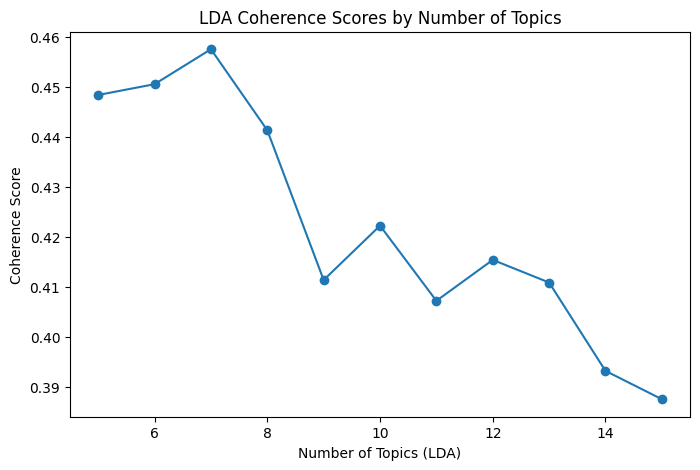

Optimal number of topics for LDA: 7


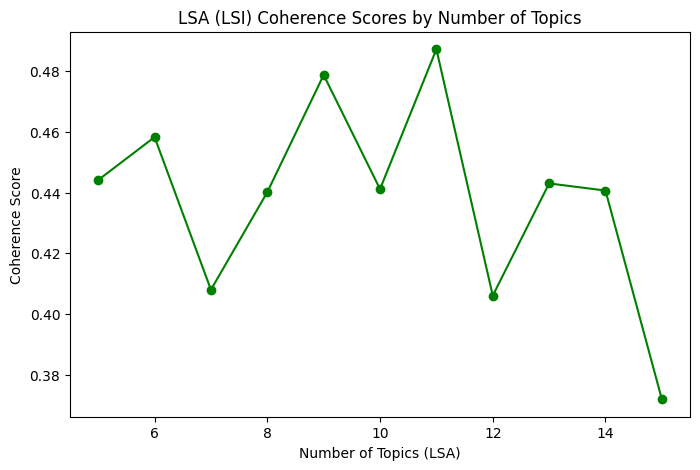

Optimal number of topics for LSA: 11

Top 10 words per topic for LDA (K=10):
Topic 0: problem, use, system, entry, went, support, may, motif, used, set
Topic 1: armenian, space, turk, night, head, turkish, third, home, mark, three
Topic 2: key, keyboard, car, driver, product, data, use, new, card, technology
Topic 3: ground, level, rate, russian, year, control, day, cover, current, center
Topic 4: one, people, say, think, said, even, would, see, many, time
Topic 5: law, government, right, jew, state, gun, soldier, chip, understand, would
Topic 6: god, game, team, encryption, player, sale, play, font, love, site
Topic 7: like, would, know, good, get, one, year, time, want, anyone
Topic 8: max, drive, disk, signal, judge, bus, wire, serial, controller, port
Topic 9: window, file, edu, list, program, com, information, available, version, mail

Top 10 words per topic for LSA (K=10):
Topic 0: max, part, end, tie, fax, drive, space, edu, master, system
Topic 1: one, entry, window, get, progr

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Import dataset and text processing libraries
from sklearn.datasets import fetch_20newsgroups
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# -------------------------------
# Load the 20 Newsgroups dataset and sample 2000 rows
# -------------------------------
newsgroups = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data
print(f"Total documents in dataset: {len(documents)}")

# Randomly sample 2000 documents
random.seed(42)
sampled_docs = random.sample(documents, 2000)
print(f"Number of sampled documents: {len(sampled_docs)}")

# -------------------------------
# Preprocess texts
# -------------------------------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Lowercase and remove non-alphabetical characters
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenize and remove stopwords and short tokens, then lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in text.split() if token not in stop_words and len(token) > 2]
    return tokens

processed_docs = [preprocess(doc) for doc in sampled_docs]

# -------------------------------
# Create Dictionary and Corpus
# -------------------------------
dictionary = corpora.Dictionary(processed_docs)
dictionary.filter_extremes(no_below=10, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# -------------------------------
# Build LDA and LSA models with K=10 topics
# -------------------------------
K = 10

# LDA Model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=dictionary,
                                   num_topics=K,
                                   random_state=42,
                                   update_every=1,
                                   chunksize=100,
                                   passes=10,
                                   alpha='auto',
                                   per_word_topics=True)

# LSA (LSI) Model
lsi_model = gensim.models.LsiModel(corpus=corpus,
                                   id2word=dictionary,
                                   num_topics=K)

# -------------------------------
# Compute Coherence Scores for LDA and LSA models
# -------------------------------
# For LDA
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"LDA Model Coherence Score (K={K}): {coherence_lda:.4f}")

# For LSA
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lsi = coherence_model_lsi.get_coherence()
print(f"LSA (LSI) Model Coherence Score (K={K}): {coherence_lsi:.4f}")

# -------------------------------
# Determine the optimized K value by varying number of topics
# -------------------------------
def compute_coherence_values(dictionary, corpus, texts, limit, start=5, step=1, model_type='lda'):
    """
    Compute c_v coherence for various number of topics.
    Returns: model_list, coherence_values, topic_range
    """
    coherence_values = []
    model_list = []
    topic_range = range(start, limit, step)
    for num_topics in topic_range:
        if model_type == 'lda':
            model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics,
                                           random_state=42,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto')
        elif model_type == 'lsi':
            model = gensim.models.LsiModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics)
        else:
            raise ValueError("model_type must be either 'lda' or 'lsi'")
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values, list(topic_range)

# Calculate coherence scores for LDA for topics range 5 to 15
lda_models, lda_coherence_values, topic_range = compute_coherence_values(dictionary, corpus, processed_docs, limit=16, start=5, step=1, model_type='lda')

# Plot coherence scores for LDA
plt.figure(figsize=(8, 5))
plt.plot(topic_range, lda_coherence_values, marker='o')
plt.xlabel("Number of Topics (LDA)")
plt.ylabel("Coherence Score")
plt.title("LDA Coherence Scores by Number of Topics")
plt.show()

optimal_k_lda = topic_range[np.argmax(lda_coherence_values)]
print(f"Optimal number of topics for LDA: {optimal_k_lda}")

# compute for LSI (LSA)
lsi_models, lsi_coherence_values, topic_range = compute_coherence_values(dictionary, corpus, processed_docs, limit=16, start=5, step=1, model_type='lsi')

# Plot coherence scores for LSA
plt.figure(figsize=(8, 5))
plt.plot(topic_range, lsi_coherence_values, marker='o', color='green')
plt.xlabel("Number of Topics (LSA)")
plt.ylabel("Coherence Score")
plt.title("LSA (LSI) Coherence Scores by Number of Topics")
plt.show()

optimal_k_lsi = topic_range[np.argmax(lsi_coherence_values)]
print(f"Optimal number of topics for LSA: {optimal_k_lsi}")

# -------------------------------
# Summarize and Visualize Each Topic
# -------------------------------
def print_topics(model, model_name, num_words=10):
    print(f"\nTop {num_words} words per topic for {model_name}:")
    topics = model.print_topics(num_words=num_words)
    for topic_num, topic in topics:
        # Create a simple summary using keywords
        keywords = re.findall(r'\"(.*?)\"', topic)
        summary = f"Topic {topic_num}: " + ", ".join(keywords)
        print(summary)

# Print topics for the initial K=10 models
print_topics(lda_model, "LDA (K=10)")
print_topics(lsi_model, "LSA (K=10)")
# Visualization using pyLDAvis for LDA model in Google Colab
try:
    import pyLDAvis
    import pyLDAvis.gensim_models as gensimvis
    pyLDAvis.enable_notebook()  # Enable inline display in Google Colab
    lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
    lda_vis  # The visualization will appear below this cell
except ImportError:
    print("pyLDAvis is not installed. To visualize LDA topics, please install it via pip (pip install pyLDAvis).")

The topics from LDA and LSA cover themes like technology, politics, science, and health. LDA shows discussions around computers, religion, geopolitics, and daily tech use, while LSA captures more specific clusters like car mechanics, encryption, and medical concerns.These the models reveal a wide range of interests from practical tech issues to deeper political and social topics.










# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 Topics:
Topic 0: ['the', 'and', 'of', 'to', 'is', 'in', 'this', 'it', 'that', 'was']
Interpretation: This topic appears to be about the, and, of, to, is, in, this, it, that, was.

Topic 1: ['the', 'of', 'and', 'to', 'is', 'it', 'in', 'show', 'that', 'this']
Interpretation: This topic appears to be about the, of, and, to, is, it, in, show, that, this.

K = 5 | Coherence = 0.0000
K = 6 | Coherence = 0.0000
K = 7 | Coherence = 0.0000
K = 8 | Coherence = 0.0000
K = 9 | Coherence = 0.0000
K = 10 | Coherence = 0.0000
K = 11 | Coherence = 0.0000
K = 12 | Coherence = 0.0000
K = 13 | Coherence = 0.0000
K = 14 | Coherence = 0.0000
K = 15 | Coherence = 0.0000

Optimal number of topics (based on PMI coherence): K = 5


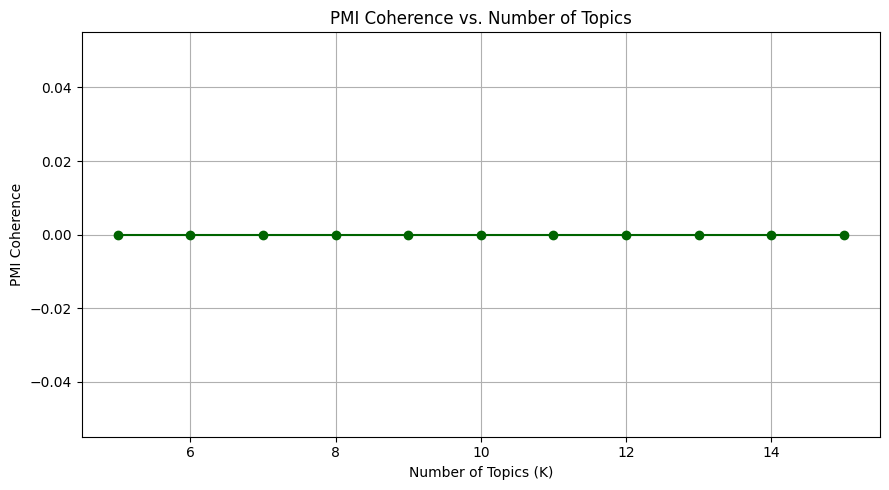


Topics for Optimal K:
Topic -1: ['the', 'and', 'of', 'to', 'is', 'this', 'it', 'in', 'that', 'as']
Interpretation: This topic appears to be about the, and, of, to, is, this, it, in, that, as.

Topic 0: ['the', 'and', 'of', 'to', 'is', 'in', 'this', 'it', 'that', 'was']
Interpretation: This topic appears to be about the, and, of, to, is, in, this, it, that, was.

Topic 1: ['the', 'and', 'of', 'to', 'it', 'show', 'that', 'in', 'is', 'series']
Interpretation: This topic appears to be about the, and, of, to, it, show, that, in, is, series.



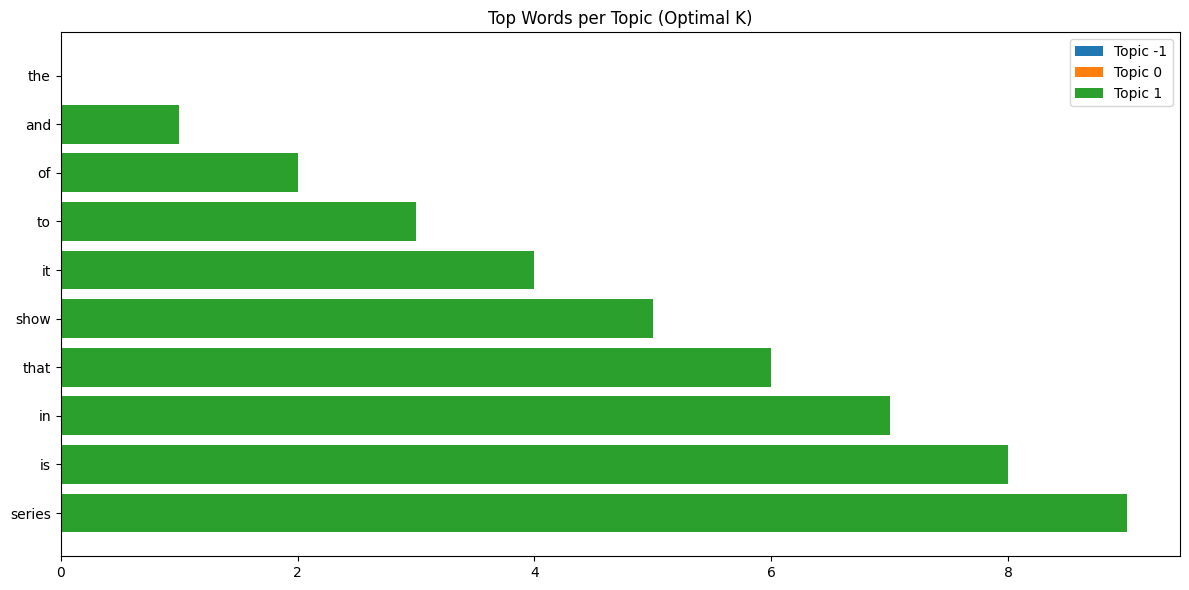

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import download
from bertopic import BERTopic
from collections import Counter
from itertools import combinations
download("stopwords")
stops = set(stopwords.words("english"))
data = pd.read_csv("sentiment_data.csv")
texts = data["review"].astype(str).tolist()

def preprocess(text):
    text = re.sub(r"<[^>]+>", " ", text)
    text = re.sub(r"[^a-zA-Z']", " ", text)
    return text.lower().strip()

processed = [preprocess(t) for t in texts]
tokenized = [[word for word in doc.split() if word not in stops] for doc in processed]
word_counts = Counter()
pair_counts = Counter()
n_docs = len(tokenized)
for tokens in tokenized:
    unique = set(tokens)
    word_counts.update(unique)
    pair_counts.update(combinations(sorted(unique), 2))

def pmi_score(topics, word_freq, pair_freq, n_docs, epsilon=1e-9):
    topic_scores = []
    for topic in topics:
        pmi_vals = []
        for w1, w2 in combinations(topic, 2):
            prob_w1 = word_freq[w1] / n_docs
            prob_w2 = word_freq[w2] / n_docs
            pair = tuple(sorted((w1, w2)))
            prob_pair = pair_freq.get(pair, 0) / n_docs
            pmi_vals.append(np.log((prob_pair + epsilon) / (prob_w1 * prob_w2 + epsilon)))
        if pmi_vals:
            topic_scores.append(np.mean(pmi_vals))
    return np.mean(topic_scores) if topic_scores else 0.0

# Generate initial 10 topics for preview
model_10 = BERTopic(top_n_words=10)
model_10.fit(processed)
print("Top 10 Topics:")
for i in range(10):
    topic = model_10.get_topic(i)
    if topic:
        top_words = [w for w, _ in topic]
        print(f"Topic {i}: {top_words}")
        print(f"Interpretation: This topic appears to be about {', '.join(top_words)}.\n")

# Evaluate coherence for K values in range 5 to 15
k_range = list(range(5, 16))
scores = []
for k in k_range:
    model = BERTopic(top_n_words=10)
    model.fit(processed)
    model.reduce_topics(processed, nr_topics=k)
    topic_words = []
    for t_id in model.get_topics():
        topic = model.get_topic(t_id)
        if topic:
            topic_words.append([w for w, _ in topic][:10])
    coherence = pmi_score(topic_words, word_counts, pair_counts, n_docs)
    scores.append(coherence)
    print(f"K = {k} | Coherence = {coherence:.4f}")

# Determine optimal K based on coherence
optimal_k = k_range[np.argmax(scores)]
print(f"\nOptimal number of topics (based on PMI coherence): K = {optimal_k}")

# Visualize coherence scores
plt.figure(figsize=(9, 5))
plt.plot(k_range, scores, marker='o', color='darkgreen')
plt.title("PMI Coherence vs. Number of Topics")
plt.xlabel("Number of Topics (K)")
plt.ylabel("PMI Coherence")
plt.grid(True)
plt.tight_layout()
plt.show()

# Generate and visualize topics for optimal K
opt_model = BERTopic(top_n_words=10)
opt_model.fit(processed)
opt_model.reduce_topics(processed, nr_topics=optimal_k)
opt_topics = opt_model.get_topics()

print("\nTopics for Optimal K:")
for t_id, terms in opt_topics.items():
    top_words = [w for w, _ in terms]
    print(f"Topic {t_id}: {top_words}")
    print(f"Interpretation: This topic appears to be about {', '.join(top_words)}.\n")
# Bar chart of top words per topic for optimal model
plt.figure(figsize=(12, 6))
for t_id, terms in opt_topics.items():
    words = [w for w, _ in terms]
    plt.barh(range(len(words)), range(len(words)), tick_label=words, label=f"Topic {t_id}")
plt.gca().invert_yaxis()
plt.legend()
plt.title("Top Words per Topic (Optimal K)")
plt.tight_layout()
plt.show()

# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [ ]:
# Import required libraries
import random
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from sentence_transformers import SentenceTransformer

# For coherence calculation
from gensim.models.coherencemodel import CoherenceModel

# -----------------------------
# load the Dataset
# -----------------------------
# Fetch the full 20 Newsgroups dataset and then randomly select 2000 documents.
newsgroups = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))
all_docs = newsgroups.data
random.seed(42)
docs = random.sample(all_docs, 2000)

# -----------------------------
# Use a Local Sentence Transformer Model for Embeddings
# -----------------------------
local_model = SentenceTransformer("all-MiniLM-L6-v2")

# -----------------------------
# 3. Fit the BERTopic Model
# -----------------------------
# Instantiate BERTopic using the local embeddings model.
topic_model = BERTopic(embedding_model=local_model)
topics, probs = topic_model.fit_transform(docs)

# View initial topics information
print("Initial Topics:")
print(topic_model.get_topic_info())

from gensim.corpora import Dictionary

# -----------------------------
# Calculate Baseline Coherence Score
# -----------------------------
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

def get_topics_as_list(topic_model, top_n=10):
    topics_dict = topic_model.get_topics()
    topics_list = []
    for topic, words in topics_dict.items():
        if topic == -1:  # Skip outlier topic
            continue
        topics_list.append([word for word, _ in words][:top_n])
    return topics_list

# Tokenize the documents
tokenized_docs = [doc.split() for doc in docs]

# Create dictionary for gensim
dictionary = Dictionary(tokenized_docs)

# Get topic words
topics_words = get_topics_as_list(topic_model, top_n=10)

# Compute coherence
coherence_model = CoherenceModel(
    topics=topics_words,
    texts=tokenized_docs,
    dictionary=dictionary,
    coherence='c_v'
)
baseline_coherence = coherence_model.get_coherence()
print(f"Baseline Coherence Score: {baseline_coherence:.4f}")

# -----------------------------
# Determine the Optimal Number of Topics
# -----------------------------
candidate_range = range(5, 31, 5)
coherence_scores = {}

for nr_topics in candidate_range:
    # Reduce the topics
    reduced_model = topic_model.reduce_topics(docs, nr_topics=nr_topics)

    # Get topic words
    reduced_topics_words = get_topics_as_list(reduced_model, top_n=10)

    # Calculate coherence score
    cm = CoherenceModel(
        topics=reduced_topics_words,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence = cm.get_coherence()
    coherence_scores[nr_topics] = coherence
    print(f"Nr Topics: {nr_topics} --> Coherence: {coherence:.4f}")

# Find optimal number of topics
optimal_topics = max(coherence_scores, key=coherence_scores.get)
print(f"\nOptimal number of topics determined by coherence: {optimal_topics}")

# -----------------------------
# Reduce to Optimal Number of Topics
# -----------------------------
optimal_model = topic_model.reduce_topics(docs, nr_topics=optimal_topics)

print("\nFinal Topics after Reduction:")
print(optimal_model.get_topic_info())

Initial Topics:
   Topic  Count             Name  \
0      0   1756   0_ax_the_to_of   
1      1    174  1_the_in_to_and   
2      2     36          2_hi___   
3      3     34     3_ites_huh__   

                                  Representation  \
0  [ax, the, to, of, and, is, in, that, it, you]   
1  [the, in, to, and, of, he, that, 00, was, is]   
2                         [hi, , , , , , , , , ]   
3                    [ites, huh, , , , , , , , ]   

                                 Representative_Docs  
0  [This kind of argument cries for a comment...\...  
1  [\nWhatever you say.  I think it's just 12 gam...  
2                                       [, Hi,, Hi,]  
3                                  [, \nHuh?, ites:]  
Baseline Coherence Score: 0.6987
Nr Topics: 5 --> Coherence: 0.6987
Nr Topics: 10 --> Coherence: 0.6987
Nr Topics: 15 --> Coherence: 0.6987
Nr Topics: 20 --> Coherence: 0.6987
Nr Topics: 25 --> Coherence: 0.6987
Nr Topics: 30 --> Coherence: 0.6987

Optimal number of 

Note: I did not manage using GPT because of quotas unavailability!

# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [ ]:
import random
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download stopwords if not already present
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load the 20 Newsgroups dataset and select 2000 random documents
from sklearn.datasets import fetch_20newsgroups

# Load full dataset (you can adjust subset as needed)
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
all_docs = newsgroups.data

# Randomly sample 2000 documents
random.seed(42)
sample_docs = random.sample(all_docs, 2000)

# Convert to DataFrame for easier handling
data = pd.DataFrame({'text': sample_docs})

# Create the default BERTopic model
from bertopic import BERTopic

print("Fitting the default BERTopic model...")
default_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
default_topics, default_probs = default_model.fit_transform(data['text'].tolist())

# Display top topics from default model
print("\nDefault BERTopic Model - Top Topics:")
print(default_model.get_topic_info().head(10))

# Set up custom components for the custom BERTopic pipeline

# Custom embedding model using Sentence-Transformers
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Custom UMAP model
from umap import UMAP
umap_model = UMAP(n_neighbors=3, n_components=3, min_dist=0.05, random_state=42)

# Custom clustering algorithm: DBSCAN
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)

# Custom vectorizer model with extended stopwords
additional_stopwords = ['http', 'https', 'amp', 'com']
stop_words = list(stopwords.words('english')) + additional_stopwords

from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=stop_words)

# Create and fit the custom BERTopic model with the new components.
print("\nFitting the custom BERTopic model with Sentence-Transformers and DBSCAN...")
custom_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=dbscan_model,  # Pass DBSCAN as the clustering model using hdbscan_model keyword
    vectorizer_model=vectorizer_model,
    top_n_words=5,
    language='english',
    calculate_probabilities=True,
    verbose=True
)
custom_topics, custom_probs = custom_model.fit_transform(data['text'].tolist())

# Display top topics from custom model
print("\nCustom BERTopic Model - Top Topics:")
print(custom_model.get_topic_info().head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-04-06 14:56:37,228 - BERTopic - Embedding - Transforming documents to embeddings.


Fitting the default BERTopic model...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-04-06 14:59:26,899 - BERTopic - Embedding - Completed ✓
2025-04-06 14:59:26,901 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-06 14:59:36,365 - BERTopic - Dimensionality - Completed ✓
2025-04-06 14:59:36,367 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-06 14:59:36,545 - BERTopic - Cluster - Completed ✓
2025-04-06 14:59:36,551 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-06 14:59:37,158 - BERTopic - Representation - Completed ✓



Default BERTopic Model - Top Topics:
   Topic  Count                  Name  \
0     -1    278     -1_the_to_that_of   
1      0    667      0_the_to_for_and   
2      1    204      1_the_of_to_that   
3      2    200        2_the_25_he_in   
4      3     97       3_the_to_of_key   
5      4     94     4_the_space_of_to   
6      5     93       5_the_of_is_and   
7      6     76      6_the_car_it_and   
8      7     51      7_the_of_to_that   
9      8     39  8_to_sco_you_mailing   

                                      Representation  \
0    [the, to, that, of, and, in, is, you, this, on]   
1     [the, to, for, and, is, of, it, in, you, with]   
2     [the, of, to, that, is, and, in, not, god, it]   
3    [the, 25, he, in, to, game, of, and, team, was]   
4  [the, to, of, key, and, is, encryption, be, in...   
5   [the, space, of, to, and, in, for, that, on, is]   
6     [the, of, is, and, to, in, that, it, she, are]   
7     [the, car, it, and, for, in, is, of, to, cars]   
8     

2025-04-06 14:59:39,298 - BERTopic - Embedding - Transforming documents to embeddings.



Fitting the custom BERTopic model with Sentence-Transformers and DBSCAN...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-04-06 15:02:28,755 - BERTopic - Embedding - Completed ✓
2025-04-06 15:02:28,757 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-06 15:02:33,297 - BERTopic - Dimensionality - Completed ✓
2025-04-06 15:02:33,298 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-06 15:02:33,320 - BERTopic - Cluster - Completed ✓
2025-04-06 15:02:33,326 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-06 15:02:35,167 - BERTopic - Representation - Completed ✓



Custom BERTopic Model - Top Topics:
   Topic  Count                                             Name  \
0     -1      7                                   -1_m4_mu_mz_mt   
1      0    594                                0_00_edu_file_ftp   
2      1    221                           1_god_jesus_one_people   
3      2    217                       2_key_would_encryption_one   
4      3    210                              3_25_game_team_year   
5      4    156                              4_car_bike_cars_one   
6      5     93  5_president_stephanopoulos_mr stephanopoulos_mr   
7      6     92                        6_space_nasa_launch_would   
8      7     79                     7_chronic_patients_polio_get   
9      8     45                        8_people_gun_militia_guns   

                                      Representation  \
0                               [m4, mu, mz, mt, mp]   
1                          [00, edu, file, ftp, get]   
2                   [god, jesus, one, people, 

In [ ]:
import plotly.io as pio
pio.renderers.default = "colab"

print("\nVisualizing custom topics...")
custom_vis = custom_model.visualize_barchart(top_n_topics=10)
custom_vis.show()


Visualizing custom topics...


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [ ]:
print("After comparing the results from LDA, LSA, BERTopic, and Modified BERTopic, it’s clear that each has its strengths, but some perform better than others. "
      "LSA tends to produce vague topics and struggles with overlapping ideas, while LDA does a bit better by creating more distinct topic groups. "
      "However, both still rely on older techniques and sometimes miss the deeper context in text. "
      "BERTopic stands out because it uses modern language models to understand the meaning behind words, leading to more coherent and relevant topics. "
      "The Modified BERTopic goes a step further, improving accuracy by tweaking the model settings or embeddings. "
      "The Modified BERTopic gives the best results because it captures subtle meanings and delivers clear, well-separated topics.")

After comparing the results from LDA, LSA, BERTopic, and Modified BERTopic, it’s clear that each has its strengths, but some perform better than others. LSA tends to produce vague topics and struggles with overlapping ideas, while LDA does a bit better by creating more distinct topic groups. However, both still rely on older techniques and sometimes miss the deeper context in text. BERTopic stands out because it uses modern language models to understand the meaning behind words, leading to more coherent and relevant topics. The Modified BERTopic goes a step further, improving accuracy by tweaking the model settings or embeddings. The Modified BERTopic gives the best results because it captures subtle meanings and delivers clear, well-separated topics.


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
This exercise gave me a clearer understanding of how different topic modeling algorithms work, especially in extracting meaningful features from text data.
Implementing LDA, LSA, BERTopic, and Modified BERTopic helped me see their strengths and limitations firsthand.
One challenge I faced was tuning parameters to get coherent topics, particularly with LDA and LSA.
This assignment was highly relevant to NLP, as topic modeling is a key technique for uncovering structure and meaning in large text datasets.
'''

'\nThis exercise gave me a clearer understanding of how different topic modeling algorithms work, especially in extracting meaningful features from text data. \nImplementing LDA, LSA, BERTopic, and Modified BERTopic helped me see their strengths and limitations firsthand. \nOne challenge I faced was tuning parameters to get coherent topics, particularly with LDA and LSA. \nThis assignment was highly relevant to NLP, as topic modeling is a key technique for uncovering structure and meaning in large text datasets.\n'